In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

- Loading the bank data


In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv", delimiter = ";")

In [49]:
df = df.dropna()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform)


In [51]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
# One hot encoding the data
df_dummies = pd.get_dummies(df, columns=['y'])

In [58]:
df_dummies.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_yes
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [0]:
# Dropping the y_no column
df_dummies.drop(['y_no'], axis=1, inplace=True)

In [56]:
df_dummies.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_yes
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


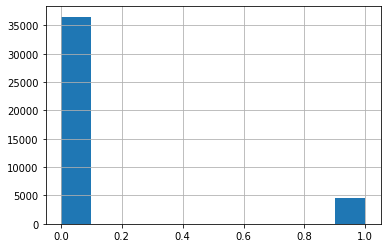

In [57]:
df_dummies['y_yes'].hist()

In [0]:
#Separating features and labels
features = df_dummies.drop(['y_yes'], axis=1)
labels = df_dummies['y_yes']

In [0]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Implementing ExtraTreesClassifier

In [61]:
# Defining a ExtraTreesClassifier
treeClassifier = ExtraTreesClassifier(n_jobs=-1, random_state=42)

# Setting parameter ranges for GridSearchCV
params = {'n_estimators': np.arange(10,150,10),  }

# Defining the GridSearchCV for parameter tuning
clf = GridSearchCV(treeClassifier, params, cv=10 ) #cv=10 means 10-fold cross validation

# Fitting the train data on the classifier
clf.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated',

In [0]:
# Select the best estimator
model = clf.best_estimator_

# predict on test set
y_pred = model.predict(X_test)


In [68]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(" -- EXTRA TREES CLASSIFIER --")
print("Accuracy\t: ", accuracy)
print("Precision\t: ", precision)
print("Recall\t\t: ", recall)
print("Kappa Score\t: ", kappa)
print("F1 Score\t: ", f1)
print("\n-------------------------------------------- \n")


 -- EXTRA TREES CLASSIFIER --
Accuracy	:  0.9072590434571498
Precision	:  0.6417910447761194
Recall		:  0.413903743315508
Kappa Score	:  0.4547222882106149
F1 Score	:  0.5032509752925877

-------------------------------------------- 



# Implementing Dummy classifier

In [69]:
# Setting dummy classifier
clf = DummyClassifier()

#Fitting training data into classifier
clf.fit(X_train, y_train)

#prediction on test set
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(" -- DUMMY CLASSIFIER --")
print("Accuracy\t: ", accuracy)
print("Precision\t: ", precision)
print("Recall\t\t: ", recall)
print("Kappa Score\t: ", kappa)
print("F1 Score\t: ", f1)
print("\n-------------------------------------------- \n")


 -- DUMMY CLASSIFIER --
Accuracy	:  0.7988589463462006
Precision	:  0.12317327766179541
Recall		:  0.12620320855614972
Kappa Score	:  0.011063332704004947
F1 Score	:  0.12466983623877444

-------------------------------------------- 



/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


# Implementing Random Forest Classifier

In [71]:
randomForestClassifier = RandomForestClassifier(n_jobs=-1, random_state=42)
params = {}


# Defining the GridSearchCV for parameter tuning
clf = GridSearchCV(randomForestClassifier, params, cv=10 ) #cv=10 means 10-fold cross validation

# Fitting the train data on the classifier
clf.fit(X_train, y_train)

# Select the best estimator
model = clf.best_estimator_

# predict on test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(" -- RANDOM FOREST CLASSIFIER --")
print("Accuracy\t: ", accuracy)
print("Precision\t: ", precision)
print("Recall\t\t: ", recall)
print("Kappa Score\t: ", kappa)
print("F1 Score\t: ", f1)
print("\n-------------------------------------------- \n")

 -- RANDOM FOREST CLASSIFIER --
Accuracy	:  0.9133284777858703
Precision	:  0.649932157394844
Recall		:  0.5122994652406417
Kappa Score	:  0.5254878568825143
F1 Score	:  0.5729665071770336

-------------------------------------------- 

